In [1]:
"""Librairies nécessaires"""

import pandas as pd
from pandas import json_normalize
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt

import json

import geopy.distance
from geopy.distance import geodesic as GD

from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

from tqdm import tqdm

In [2]:
"""Changement de directory pour lire les fichiers"""
import os
os.getcwd() #trouver le directory actuel 
os.chdir('/home/onyxia/work/Projet-Stat-App-2A')

In [5]:
"""Lecture du fichier des lieux de culte """
emplacement_lieux_culte = '3.0) Enrichissement données/Données/lieux_culte.geojson'
df = gpd.read_file(emplacement_lieux_culte, index_col=0)

In [15]:
df_lieux_culte = df.copy()

In [11]:
df_lieux_culte.head(2)

,name,religion,denomination,wheelchair,website,phone,ref_fr_cef,id,wikipedia,wikidata,source,other_tags,geometry
0,Église l'Assomption de Notre-Dame,christian,catholic,NaN,NaN,NaN,NaN,https://www.openstreetmap.org/api/0.6/node/627...,NaN,NaN,cadastre-dgi-fr source : Direction Générale de...,{'building': 'church'},POINT (3.00364 49.67067)
1,Église Saint-Eutrope,christian,catholic,NaN,NaN,NaN,46318_01,https://www.openstreetmap.org/api/0.6/node/294...,NaN,NaN,cadastre-dgi-fr source : Direction Générale de...,"{'building': 'church', 'source:name': 'clocher...",POINT (1.83011 44.74113)


In [16]:
"""Chargement des données administratives de Paris intra muros"""

paris_arrondissement = gpd.read_file('2) Visualisation/Données_carto/paris_arrondissements.geojson')

In [17]:
"""Lieux de culte parisiens"""
df_lieux_culte = gpd.sjoin(df_lieux_culte, paris_arrondissement, how='inner')

In [22]:
df_lieux_culte.shape

(369, 28)

Text(0.5, 1.0, 'Carte des lieux de culte retenus à Paris')

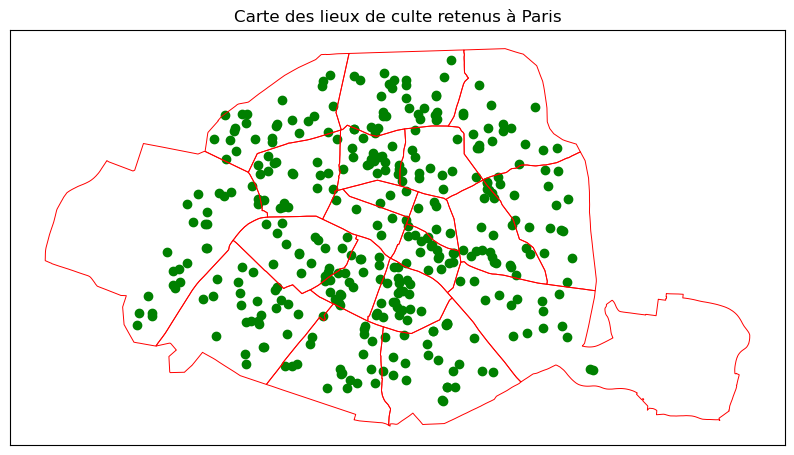

In [30]:
"""Visualisation des lieux de cultes sur une carte"""

fig, ax = plt.subplots(figsize=(10, 8))

base = paris_arrondissement.boundary.plot(ax=ax, edgecolor = "red", linewidth = 0.7)
df_lieux_culte.plot(ax=ax, color='green')

plt.xticks([], [])
plt.yticks([], [])

plt.title('Carte des lieux de culte retenus à Paris')


In [26]:
res = df_lieux_culte.groupby('religion').size()

In [28]:
df_muslim = df_lieux_culte.loc[df_lieux_culte['religion']=='muslim']